In [8]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import numpy as np

In [9]:
def get(location, page_num):
    headers = {
        'accept': 'application/json',
        'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
        'if-modified-since': 'Sun, 29 Sep 2024 23:57:21 GMT',
        'origin': 'https://afdc.energy.gov',
        'priority': 'u=1, i',
        'referer': 'https://afdc.energy.gov/',
        'sec-ch-ua': '"Microsoft Edge";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'cross-site',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0',
    }
    
    params = {
        'api_key': 'w30dJhEvcdCHxEHImCSL0GIAXETjLIJ41lgoN0Jr',
        'country': 'all',
        'maximum_vehicle_class': 'all',
        'owner_type': 'all',
        'cards_accepted': 'all',
        'offset': str(200 * (page_num - 1)),
        'fuel_type': 'ELEC',
        'access': 'public',
        'status': 'E',
        'cng_fill_type': 'all',
        'cng_has_rng': 'all',
        'cng_psi': 'all',
        'ev_charging_level': '2,dc_fast',
        'ev_connector_type': 'all',
        'ev_network': 'all',
        'funding_sources': 'all',
        'e85_has_blender_pump': 'false',
        'lng_has_rng': 'all',
        'hy_is_retail': 'true',
        'lpg_include_secondary': 'false',
        'location': location,
        'radius': 'infinite',
        'limit': '200',
    }
    
    response = requests.get('https://developer.nrel.gov/api/alt-fuel-stations/v1/nearest.json', params=params, headers=headers)
    data = response.json()['fuel_stations']
    name_list = []
    phone_list = []
    facility_list = []
    access_list = []
    time_list = []
    fuel_type_list = []
    id_list = []
    street_list = []
    zip_list = []
    longitude_list = []
    latitude_list = []
    for station in data:
        name_list.append(station['station_name'])
        phone_list.append(station['station_phone'])
        facility_list.append(station['facility_type'])
        access_list.append(station['access_code'])
        time_list.append(station['access_days_time'])
        fuel_type_list.append(station['fuel_type_code'])
        id_list.append(station['id'])
        street_list.append(station['street_address'])
        zip_list.append(station['zip'])
        longitude_list.append(station['longitude'])
        latitude_list.append(station['latitude'])
    station_dict = {
        'id': id_list,
        'Name': name_list,
        'Phone': phone_list,
        'Facility': facility_list,
        'Access': access_list,
        'Access Time': time_list,
        'Fuel Type': fuel_type_list,
        'Street Address': street_list,
        'Zip': zip_list,
        'Longitude': longitude_list,
        'Latitude': latitude_list
    }
    station_df = pd.DataFrame.from_dict(station_dict)
    return station_df

In [10]:
get('pittsburgh', 1)

,id,Name,Phone,Facility,Access,Access Time,Fuel Type,Street Address,Zip,Longitude,Latitude
0,81613,Oxford Center Garage,800-128-4567,PARKING_GARAGE,public,8am-6pm daily,ELEC,301 Grant St,15219,-79.998858,40.438052
1,174880,ONEOXFORDCENTRE STATION 3,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999009,40.437939
2,174881,ONEOXFORDCENTRE STATION 2,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999038,40.437957
3,150792,ONEOXFORDCENTRE STATION 4,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999039,40.437941
4,174882,ONEOXFORDCENTRE STATION 1,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999081,40.437991
...,...,...,...,...,...,...,...,...,...,...,...
195,152103,EASTSIDE BOND BOND GARAGE 3,888-758-4389,None,public,24 hours daily,ELEC,6105 Spirit St,15206,-79.923095,40.459914
196,174911,EASTSIDE BOND BOND GARAGE 4,888-758-4389,None,public,24 hours daily,ELEC,6105 Spirit St,15206,-79.923042,40.459947
197,327473,PPAP PPA/KIRKWD 10,888-758-4389,None,public,24 hours daily,ELEC,6117 Kirkwood Street,15206,-79.923197,40.461574
198,327472,PPAP PPAKIRKWD 9,888-758-4389,None,public,24 hours daily,ELEC,6117 Kirkwood Street,15206,-79.923155,40.461577


In [11]:
def get_all(location):
    total_df = None
    i = 1
    while True:
        result_df = get(location, i)
        print(f'Currently processing page {i}: {(i - 1) * 200 + 1}~{i * 200}')
        if len(result_df) == 0:
            break
        total_df = pd.concat([total_df, result_df], axis=0)
        print(f'Processing finished page {i}: {(i - 1) * 200 + 1}~{i * 200}\n')
        i += 1
    return total_df

In [12]:
total_df = get_all('pittsburgh')
display(total_df)

Currently processing page 1: 1~200
Processing finished page 1: 1~200

Currently processing page 2: 201~400
Processing finished page 2: 201~400

Currently processing page 3: 401~600
Processing finished page 3: 401~600

Currently processing page 4: 601~800
Processing finished page 4: 601~800

Currently processing page 5: 801~1000
Processing finished page 5: 801~1000

Currently processing page 6: 1001~1200
Processing finished page 6: 1001~1200

Currently processing page 7: 1201~1400
Processing finished page 7: 1201~1400

Currently processing page 8: 1401~1600
Processing finished page 8: 1401~1600

Currently processing page 9: 1601~1800
Processing finished page 9: 1601~1800

Currently processing page 10: 1801~2000
Processing finished page 10: 1801~2000

Currently processing page 11: 2001~2200
Processing finished page 11: 2001~2200

Currently processing page 12: 2201~2400
Processing finished page 12: 2201~2400

Currently processing page 13: 2401~2600
Processing finished page 13: 2401~2600



,id,Name,Phone,Facility,Access,Access Time,Fuel Type,Street Address,Zip,Longitude,Latitude
0,81613,Oxford Center Garage,800-128-4567,PARKING_GARAGE,public,8am-6pm daily,ELEC,301 Grant St,15219,-79.998858,40.438052
1,174880,ONEOXFORDCENTRE STATION 3,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999009,40.437939
2,174881,ONEOXFORDCENTRE STATION 2,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999038,40.437957
3,150792,ONEOXFORDCENTRE STATION 4,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999039,40.437941
4,174882,ONEOXFORDCENTRE STATION 1,888-758-4389,None,public,24 hours daily,ELEC,339 Cherry Way,15219,-79.999081,40.437991
...,...,...,...,...,...,...,...,...,...,...,...
149,174032,A&B PROPERTIES STATION 2,888-758-4389,None,public,24 hours daily,ELEC,4454 Nuhou St,96766,-159.386430,21.968660
150,217981,Kiahuna Plantation Resort,808-742-6411,HOTEL,public,24 hours daily,ELEC,2253 Poipu Rd,96756,-159.457230,21.875863
151,45973,Marriott - Waiohai Beach Club,808-742-4400,HOTEL,public,24 hours daily; for guest use only; see front ...,ELEC,2249 Poipu Rd,96756,-159.456719,21.874944
152,198141,A&B PROPERTIES TSAK MAKAI LOT,888-758-4389,None,public,24 hours daily,ELEC,2829 Ala Kalanikaumaka St,96756,-159.469420,21.883339


In [13]:
total_df.to_csv('./stations.csv', index=False)

In [36]:
def get_number_spec(location, page_num):
    headers = {
        'accept': 'application/json',
        'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
        'if-modified-since': 'Sun, 29 Sep 2024 23:57:21 GMT',
        'origin': 'https://afdc.energy.gov',
        'priority': 'u=1, i',
        'referer': 'https://afdc.energy.gov/',
        'sec-ch-ua': '"Microsoft Edge";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'cross-site',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0',
    }
    
    params = {
        'api_key': 'w30dJhEvcdCHxEHImCSL0GIAXETjLIJ41lgoN0Jr',
        'country': 'all',
        'maximum_vehicle_class': 'all',
        'owner_type': 'all',
        'cards_accepted': 'all',
        'offset': str(200 * (page_num - 1)),
        'fuel_type': 'ELEC',
        'access': 'public',
        'status': 'E',
        'cng_fill_type': 'all',
        'cng_has_rng': 'all',
        'cng_psi': 'all',
        'ev_charging_level': '2,dc_fast',
        'ev_connector_type': 'all',
        'ev_network': 'all',
        'funding_sources': 'all',
        'e85_has_blender_pump': 'false',
        'lng_has_rng': 'all',
        'hy_is_retail': 'true',
        'lpg_include_secondary': 'false',
        'location': location,
        'radius': 'infinite',
        'limit': '200',
    }
    response = requests.get('https://developer.nrel.gov/api/alt-fuel-stations/v1/nearest.json', params=params, headers=headers)
    data = response.json()['fuel_stations']
    return len(data)

def get_number(location):
    i = 1
    ans = 0
    while True:
        res = get_number_spec(location, i)
        if res > 0:
            ans += res
            i += 1
        else:
            break
    return ans

get_number('pittsburgh')

78735

In [53]:
def get_total_number(location):
    headers = {
        'accept': 'application/json',
        'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
        'if-modified-since': 'Sun, 29 Sep 2024 23:57:21 GMT',
        'origin': 'https://afdc.energy.gov',
        'priority': 'u=1, i',
        'referer': 'https://afdc.energy.gov/',
        'sec-ch-ua': '"Microsoft Edge";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'cross-site',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0',
    }
    
    params = {
        'api_key': 'w30dJhEvcdCHxEHImCSL0GIAXETjLIJ41lgoN0Jr',
        'country': 'all',
        'maximum_vehicle_class': 'all',
        'owner_type': 'all',
        'cards_accepted': 'all',
        'offset': 0,
        'fuel_type': 'ELEC',
        'access': 'public',
        'status': 'E',
        'cng_fill_type': 'all',
        'cng_has_rng': 'all',
        'cng_psi': 'all',
        'ev_charging_level': '2,dc_fast',
        'ev_connector_type': 'all',
        'ev_network': 'all',
        'funding_sources': 'all',
        'e85_has_blender_pump': 'false',
        'lng_has_rng': 'all',
        'hy_is_retail': 'true',
        'lpg_include_secondary': 'false',
        'location': location,
        'radius': 'infinite',
        'limit': '200',
    }
    response = requests.get('https://developer.nrel.gov/api/alt-fuel-stations/v1/nearest.json', params=params, headers=headers)
    return response.json()['total_results']

get_total_number('pittsburgh')

78744

78754


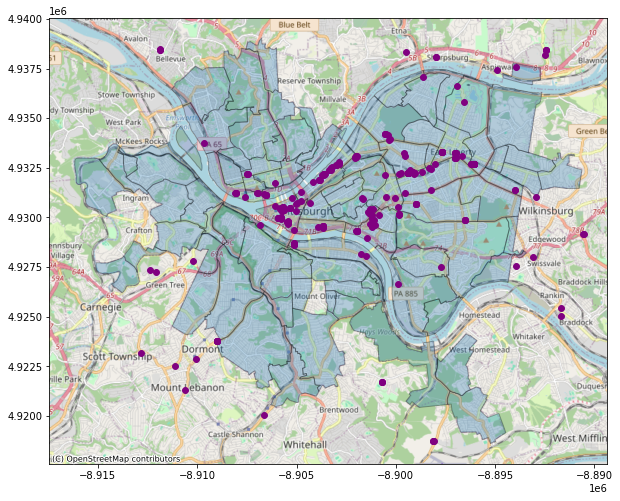

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

gdf = gpd.read_file('./Neighborhoods_.shp')
gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.3, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

total_df = pd.read_csv('./stations.csv')
longitude, latitude = total_df['Longitude'], total_df['Latitude']
print(len(longitude))
scatter_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitude, latitude), crs='EPSG:4326')
scatter_gdf.to_crs(epsg=3857).plot(ax=ax, color='purple', markersize=35)
plt.show()